# Анализ и построение модели по данным о ценах на дома

## Импорт пакетов
- `matplotlib.pyplot` и `pylab` - рисование графиков
- `pandas` - работа с таблицами
- `numpy` - работа с матрицами
- `linear_model` - модель линейной регрессии

In [1]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import pandas as pd

import numpy as np

# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

import xgboost as xg 

%matplotlib inline

## Анализ данных

`kc_house_data.csv`

[Dataset source](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

### Загрузка данных

In [2]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/kc_house_data.csv")
df = pd.read_csv(data_csv)

# вывести первые 5 строк из таблицы
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# вывести последние 5 строк таблицы
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Исследование данных (Data Exploration)

**По умолчанию будет выдана информация только для количественных признаков.**
- `count` - количество элементов
- `mean` - среднее значение
- `std` - стандартное отклонение
- `min` - минимальное значение
- `25%` - нижний квартиль
- `50%` - медиана
- `75%` - верхний квартиль
- `max` - максимальное значение

In [5]:
# обзор Dataframe
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# выбрать несколько столбцов для дальнейшего рассмотрения
short_df = df[['bedrooms','bathrooms','floors', 'waterfront', 'view', 'yr_built', 'yr_renovated', 'condition', 'grade', 'sqft_living15', 'price']]

short_df.head(9)    # вывести первые 9 строк

,bedrooms,bathrooms,floors,waterfront,view,yr_built,yr_renovated,condition,grade,sqft_living15,price
0,3,1.00,1.0,0,0,1955,0,3,7,1340,221900.0
1,3,2.25,2.0,0,0,1951,1991,3,7,1690,538000.0
2,2,1.00,1.0,0,0,1933,0,3,6,2720,180000.0
3,4,3.00,1.0,0,0,1965,0,5,7,1360,604000.0
4,3,2.00,1.0,0,0,1987,0,3,8,1800,510000.0
5,4,4.50,1.0,0,0,2001,0,3,11,4760,1225000.0
6,3,2.25,2.0,0,0,1995,0,3,7,2238,257500.0
7,3,1.50,1.0,0,0,1963,0,3,7,1650,291850.0
8,3,1.00,1.0,0,0,1960,0,3,7,1780,229500.0


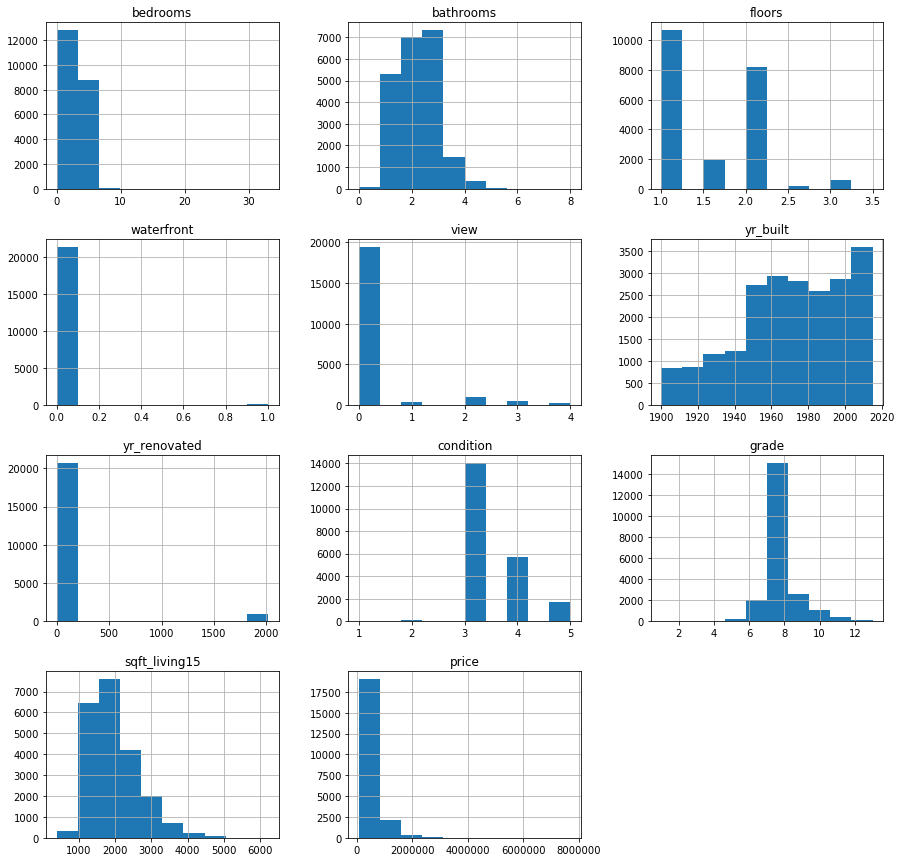

In [7]:
short_df.hist(figsize = (15,15))    # гистограмма
plt.show()

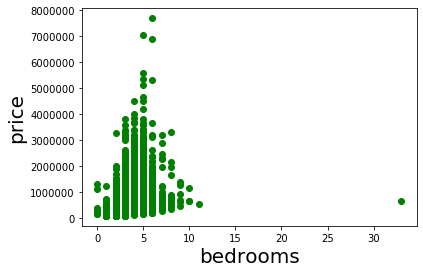

In [8]:
plt.scatter(short_df['bedrooms'], 
            short_df['price'],  
            color='green')
plt.xlabel("bedrooms", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

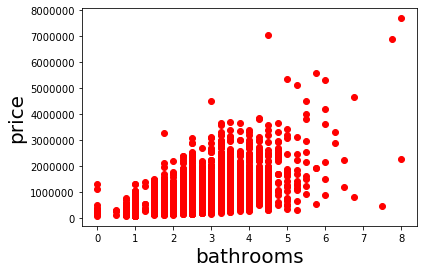

In [9]:
plt.scatter(short_df['bathrooms'], 
            short_df['price'],  
            color='red')
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

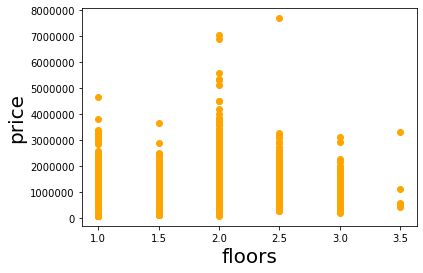

In [10]:
plt.scatter(short_df['floors'], 
            short_df['price'],  
            color='orange')
plt.xlabel("floors", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

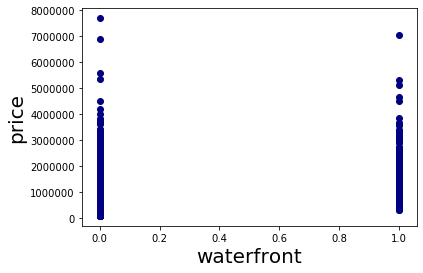

In [11]:
plt.scatter(short_df['waterfront'], 
            short_df['price'],  
            color='navy')
plt.xlabel("waterfront", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

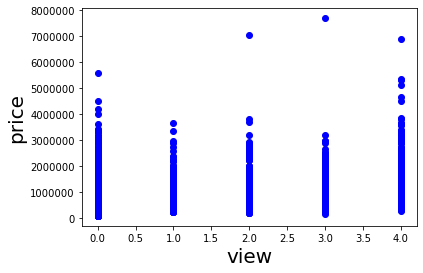

In [12]:
plt.scatter(short_df['view'], 
            short_df['price'],  
            color='blue')
plt.xlabel("view", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

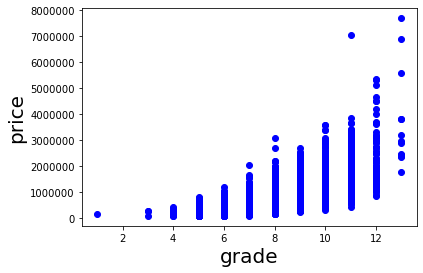

In [13]:
plt.scatter(short_df['grade'], 
            short_df['price'],  
            color='blue')
plt.xlabel("grade", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

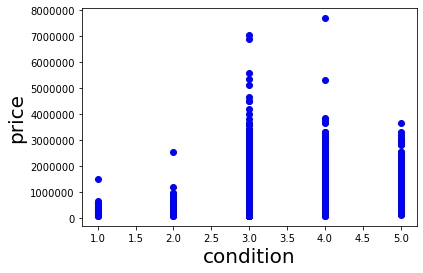

In [14]:
plt.scatter(short_df['condition'], 
            short_df['price'],  
            color='blue')
plt.xlabel("condition", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

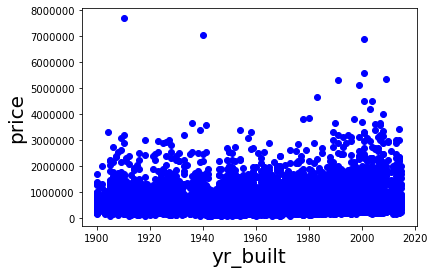

In [15]:
plt.scatter(short_df['yr_built'], 
            short_df['price'],  
            color='blue')
plt.xlabel("yr_built", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

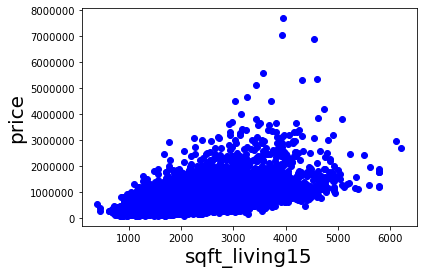

In [16]:
plt.scatter(short_df['sqft_living15'], 
            short_df['price'],  
            color='blue')
plt.xlabel("sqft_living15", fontsize=20)
plt.ylabel("price", fontsize=20)
plt.show()

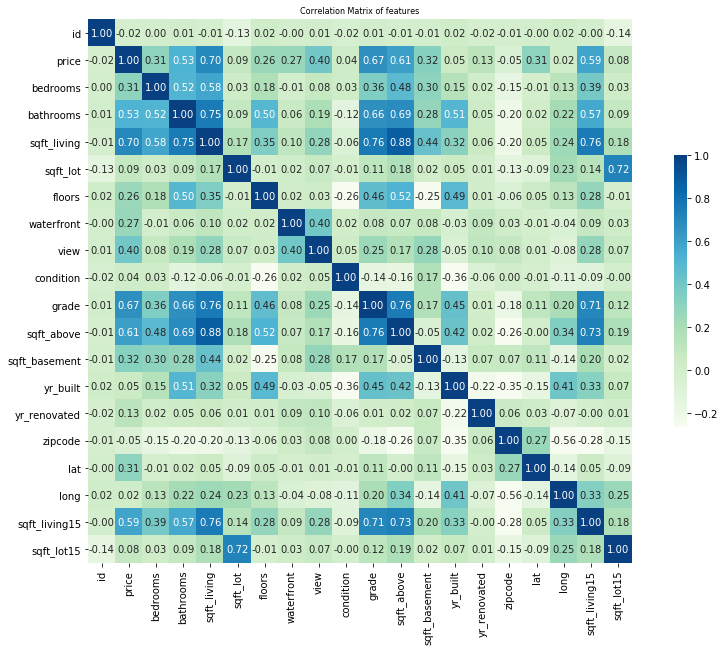

In [17]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
ax = sns.heatmap(
correlation_matrix,
vmax=1,
square=True,
annot=True,
fmt='.2f',
cmap='GnBu',
cbar_kws={"shrink": .5},
robust=True)
plt.title('Correlation Matrix of features', fontsize=8)
plt.show()


## Подготовка данных

In [18]:
# разделить данные на train (80%) и test (20%)
msk = np.random.rand(len(df)) < 0.8
train = short_df[msk]
test = short_df[~msk]

## Простая линейная регрессия

In [19]:
# создать объект линейной регрессии
simple_regr = linear_model.LinearRegression()

# разделить независимую и зависимую переменные
x_train = np.asanyarray(train[['bathrooms']])
y_train = np.asanyarray(train[['price']])

# обучить модель
simple_regr.fit(x_train, y_train)

# вывести результаты обучения
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ',simple_regr.intercept_)

Coefficients:  [[253633.70753002]]
Intercept:  [4182.61383214]


Text(0, 0.5, 'price')

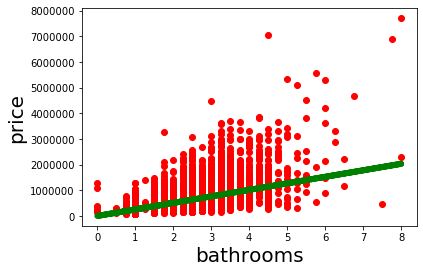

In [20]:
plt.scatter(train.bathrooms, train.price,  color='red')
plt.plot(x_train, simple_regr.coef_[0][0]*x_train + simple_regr.intercept_[0], '-g', linewidth=6)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

In [21]:
# использовать обученную модель для предсказания на test выборке
y_predicted = simple_regr.predict(test[['bathrooms']])
x_test = np.asanyarray(test[['bathrooms']])
y_test = np.asanyarray(test[['price']])

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.265339413053878
MSE: 86944903679.816
MAE: 294864.21227374475


## Полиномиальная регрессия (квадратичная) 2D

Coefficients:  [[      0.         -165918.35670923   90210.35325305]]
Intercept:  [433874.69966162]
R2: 0.3051934170973746
MSE: 82228300387.91934
MAE: 286754.773958376


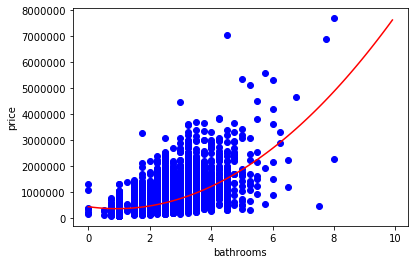

In [22]:
x_train = np.asanyarray(train[['bathrooms']])
y_train = np.asanyarray(train[['price']])

x_test = np.asanyarray(test[['bathrooms']])
y_test = np.asanyarray(test[['price']])


poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(x_train_poly, y_train)

# The coefficients
print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

plt.scatter(train.bathrooms, train.price,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = poly_regr.intercept_[0]+ poly_regr.coef_[0][1]*XX+ poly_regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("bathrooms")
plt.ylabel("price")

x_test_poly = poly.fit_transform(x_test)
y_predicted = poly_regr.predict(x_test_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Полиномиальная регрессия (кубическая) 2D

Coefficients:  [[      0.         -172425.1883257    92762.89531432    -286.41120076]]
Intercept:  [438559.3870067]
R2: 0.3051934170973746
MSE: 82228300387.91934
MAE: 286754.773958376


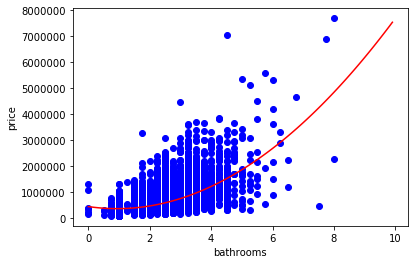

In [23]:
poly3 = PolynomialFeatures(degree=3)
x_train_poly3 = poly3.fit_transform(x_train)
cubic_regr = linear_model.LinearRegression()
y3_train = cubic_regr.fit(x_train_poly3, y_train)

# The coefficients
print ('Coefficients: ', cubic_regr.coef_)
print ('Intercept: ',cubic_regr.intercept_)

plt.scatter(train.bathrooms, train.price,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = cubic_regr.intercept_[0]+ cubic_regr.coef_[0][1]*XX + cubic_regr.coef_[0][2]*np.power(XX, 2) + cubic_regr.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("bathrooms")
plt.ylabel("price")

test_x_poly3 = poly3.fit_transform(x_test)
y3_predicted = cubic_regr.predict(test_x_poly3)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

## Множественная линейная регрессия (2D)

In [24]:
# выбрать даннные для обучения / предсказания
columns = ['bathrooms','sqft_living15']

# разделить независимую и зависимую переменные / train и test
x_train = np.asanyarray(train[columns])
y_train = np.asanyarray(train[['price']])

x_test = np.asanyarray(test[columns])
y_test = np.asanyarray(test[['price']])

In [25]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# разделить независимую и зависимую переменные
x_train = np.asanyarray(train[columns])
y_train = np.asanyarray(train[['price']])

# обучить модель
multiple_regr.fit(x_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

Coefficients:  [[137570.31685256    229.58006252]]
Intercept:  [-206710.89836041]


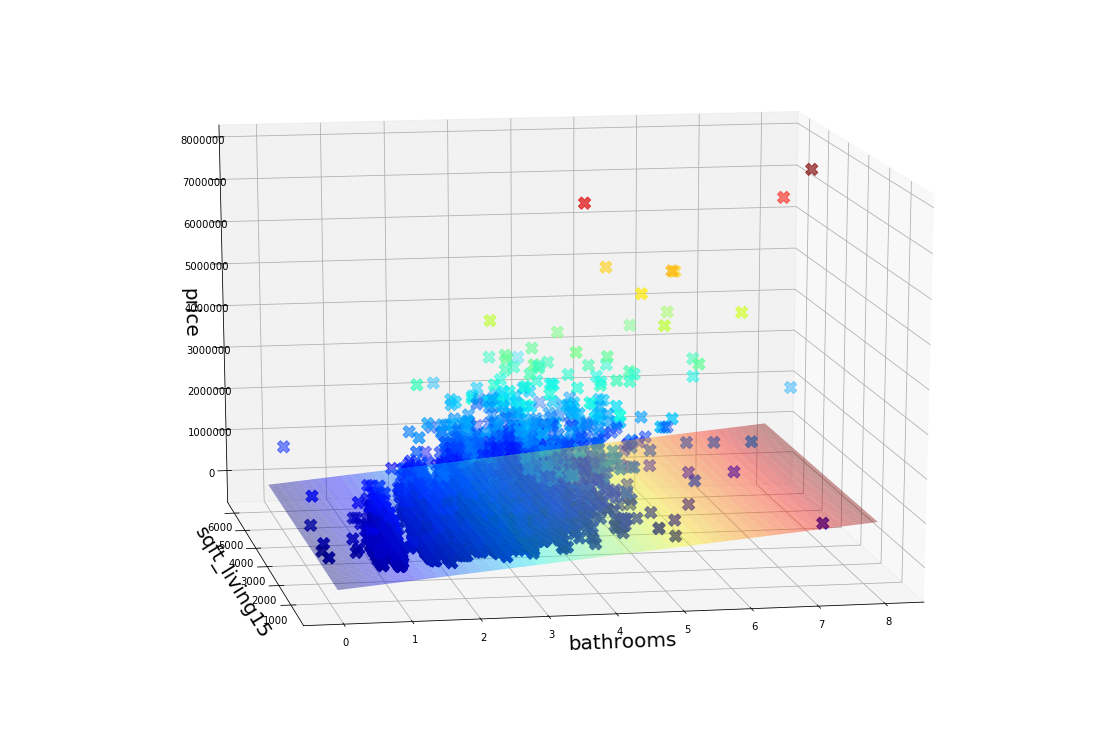

In [26]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
# Creating figure
fig = plt.figure(figsize = (15, 10))

# ax = plt.axes(projection ="3d")
ax = Axes3D(fig, azim=-100, elev=15)

# Creating plot
ax.scatter3D(train.bathrooms, 
             train.sqft_living15, 
             train.price, 
             c = train.price, 
             marker='X', 
             cmap='jet',    # https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html
             s=150,
            facecolor='black')
ax.set_xlabel('bathrooms', fontsize=20)
ax.set_ylabel('sqft_living15', fontsize=20)
ax.set_zlabel('price', fontsize=20)

xspan = np.linspace(train.bathrooms.min(), train.bathrooms.max())
yspan = np.linspace(train.sqft_living15.min(), train.sqft_living15.max())
xspan, yspan = np.meshgrid(xspan, yspan)

Z = multiple_regr.intercept_[0] + multiple_regr.coef_[0][0] * xspan
+ multiple_regr.coef_[0][1] * yspan

surf = ax.plot_surface(xspan, yspan, Z, cmap='jet', alpha=0.4, linewidth=0)

In [27]:
# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(test[columns])
x_test = np.asanyarray(test[columns])
y_test = np.asanyarray(test[['price']])

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.3866614360995124
MSE: 72586801727.19731
MAE: 269419.3789006227


## Множественная линейная регрессия (N-D)

In [28]:
# выбрать даннные для обучения / предсказания
columns = ['bathrooms', 'grade', 'condition', 'yr_built', 'sqft_living15']

# разделить независимую и зависимую переменные / train и test
x_train = np.asanyarray(train[columns])
y_train = np.asanyarray(train[['price']])

x_test = np.asanyarray(test[columns])
y_test = np.asanyarray(test[['price']])

In [29]:
# создать объект линейной регрессии
multiple_regr = linear_model.LinearRegression()

# обучить модель
multiple_regr.fit(x_train, y_train)

# вывести результаты обучения
print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

# использовать обученную модель для предсказания на test выборке
y_predicted = multiple_regr.predict(test[columns])

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [[ 1.23432579e+05  1.67099622e+05  2.11789760e+04 -4.57075416e+03
   9.79044509e+01]]
Intercept:  [7742745.39038192]
R2: 0.5820594970129096
MSE: 49462020178.81129
MAE: 222400.58493360868


## Обучение модели (Train) - XGBoost for Regression

In [30]:
# разделить независимую и зависимую переменные / train и test
from sklearn.model_selection import train_test_split
Y = df['price'].copy()
X = df.drop(['id','date', 'price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [31]:
xgb_r = xg.XGBRegressor(#objective ='reg:linear', 
                  n_estimators=900,learning_rate=0.05,max_depth=5) 

# Fitting the model 
xgb_r.fit(x_train, y_train) 

# Predict the model 
y_predicted = xgb_r.predict(x_test) 

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

R2: 0.8844800613889098
MSE: 17296959047.36683
MAE: 131517.9039042473


## Полиномиальная регрессия (квадратичная) N-D

In [32]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)

poly_regr = linear_model.LinearRegression()
poly_regr.fit(x_train_poly, y_train)

# The coefficients
print('Coefficients: ', poly_regr.coef_)
print('Intercept: ', poly_regr.intercept_)

x_test_poly = poly.fit_transform(x_test)
y_predicted = poly_regr.predict(x_test_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")

Coefficients:  [ 1.20697841e+02  1.36261312e+07 -6.06217216e+06 -8.40236355e+04
 -2.86321917e+02 -3.66399752e+07  6.35653733e+07  6.14819457e+05
 -1.94769905e+05 -1.44383385e+07  1.19822106e+05  5.53374572e+04
 -1.82019877e+05  3.17977555e+04 -4.49538619e+05  1.21515037e+08
  8.95911461e+06 -1.56017805e+04  7.45426122e+02  6.66649150e+02
 -4.81982503e+03  1.69697595e+02  1.33436145e-01  2.26797263e+04
 -5.32795041e+04  2.65013007e+03 -1.40760278e+03  4.26289403e+03
 -1.90274351e+02 -1.78882016e+02 -2.96898237e+02 -9.48356155e+00
 -3.15255551e+01 -2.71634374e+04  7.10313940e+04  5.12308950e-01
 -1.32399140e-02 -3.35738555e+03  2.95054260e+01 -3.39672016e-01
 -3.18804506e+04  3.57680831e+04  9.17061710e+03 -1.33886300e+04
 -1.06519978e+03  2.32842636e+01  5.84027221e+00  4.27452557e+02
 -2.45716123e+01 -9.37091687e+01  3.15032472e+04 -1.06150085e+05
 -5.74573806e+00  2.26757693e-01  3.65852069e+01  2.46519783e+03
 -6.93526195e+00  5.68662322e+01 -4.33400484e+00  7.36966065e+00
  2.176969

## Полиномиальная регрессия (4-я степень) N-D

In [ ]:
poly3 = PolynomialFeatures(degree=4)
x_train_poly3 = poly3.fit_transform(x_train)
cubic_regr = linear_model.LinearRegression()
cubic_regr.fit(x_train_poly3, y_train)

# The coefficients
print ('Coefficients: ', cubic_regr.coef_)
print ('Intercept: ',cubic_regr.intercept_)

test_x_poly = poly3.fit_transform(x_test)
y_predicted = cubic_regr.predict(test_x_poly)

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")
print(f"MAE: {mean_squared_error(y_test, y_predicted, squared=False)}")